# Ecuaciones de una variable

In [2]:
#import some useful packages and some stylish
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import *
plt.style.use('seaborn')
#%matplotlib inline #ejecutar esta línea cuando se trabaje en un servidor jupyter
pd.set_option("display.precision", 10) #ejecutar esta línea para mejorar la presición de pandas más dígitos

In [23]:
## MÉTODOS
### Método de gráfico
#### Grafica de funciones
def graficar(f, x_i, x_f, int = 1000):
    fig, ax = plt.subplots()
    x = np.linspace(x_i, x_f, int)
    ax.plot(x, f(x))
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    ax.grid(True, linestyle='-')
    ax.annotate("", xy=(xmax, 0), xytext=(xmin, 0),
                arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
    ax.annotate("", xy=(0, ymax), xytext=(0, ymin),
                arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
    plt.show()

### Método de bisección
#### Solucion aproximada para f(x)=0 en el intervalo [a,b] por el metodo de biseccion.
'''
---
#### Parametros de entrada

    f : funcion
        Funcion a la que se le intenta encontrar una solucion para la ecuacion f(x)=0.
    a,b : números
        Intervalo en el cual se desea buscar la solucion.
		Si f(a)*f(b) >= 0 el método no regresa ningún valor, la solución no esta garantizada.
    tol: tolerancia - número
	    Criterio de convergencia para el valor aproximado de x en f(x).
    N : máximo número de iteraciones
---
#### Parametros de salida
    tabla: Dataframe con los datos de las iteraciones
    c_n : Numero
        Este el el valor medio del N-esimo intervalo calculado en el metodo de bissecion.
		El intervalo inicial [a_0,b_0] es dado por [a,b]. Si f(m_n) == 0 para algún valor
		medio m_n = (a_n + b_n)/2, entonces la funcion regresa esa solución. Si todos los
		signos de los valores de f(a_n), f(b_n) y f(m_n) son iguales en cualquier iteracion,
		entonces el metodo de biseccion falla y no devuelve nada.
'''
def met_biseccion(f, a, b, tol, N=100):
    if f(a) * f(b) > 0:  # intevarlo fallido
        print("El metodo de bisección falló.")
        return None,None #fin de la función
    n = 0
    c_n = (a + b) / 2.0  # punto medio
    a_n = a
    b_n = b
    error_abs = abs(b_n - a_n)
    lista=[[n, a_n, b_n, c_n, f(c_n), error_abs]] #agrega el dato a la lista
    while error_abs > tol and n <= N-1 and f(c_n)!=0:
        if f(a_n) * f(c_n) < 0:
            b_n = c_n
        else:
            a_n = c_n
        error_abs = abs(b_n - a_n)
        c_n = (a_n + b_n) / 2.0
        n += 1
        lista.append([n,a_n, b_n, c_n, f(c_n),error_abs])
    tabla = pd.DataFrame(lista, columns=['n','a_n', 'b_n', 'c_n', 'f(c_n)', 'error_abs']).set_index('n')
    return tabla, c_n

### Método de _regula falsi_
#### Solucion aproximada para f(x)=0 en el intervalo [a,b] por el metodo de la posición falsa.
'''
---
### Parametros de entrada

    f : funcion
        Funcion a la que se le intenta encontrar una solucion para la ecuacion f(x)=0.
    a,b : números
        Intervalo en el cual se desea buscar la solucion.
		f(a)*f(b) >= 0 el método no regresa ningún valor, la solución no esta garantizada.
    tol: tolerancia
	    Criterio de convergencia para el valor aproximado de x en f(x).
    N : máximo número de iteraciones
---
### Parametros de salida
    tabla: Dataframe con los datos de las iteraciones
    c_n : Numero
        Este el el valor donde corta la recta que pasa por los puntos (a,f(a)) y (b,f(b))
'''
def met_regulafalsi(f, a, b, tol, N=100):
    if f(a) * f(b) > 0:  # intevarlo fallido
        print("El metodo de bisección falló.")
        return None,None #fin de la función
    n = 0
    c_n = b-(f(b)*(b-a))/(f(b)-f(a)) # falsa posición
    a_n = a
    b_n = b
    error_rel = 1
    lista=[[n, a_n, b_n, c_n, f(c_n), error_rel]] #agrega el dato a la lista
    while error_rel > tol and n <= N-1 and f(c_n)!=0:
        if f(a_n) * f(c_n) < 0:
            b_n = c_n
        else:
            a_n = c_n
        c_o = c_n
        c_n = b_n-(f(b_n)*(b_n-a_n))/(f(b_n)-f(a_n))
        error_rel = abs((c_o - c_n)/c_n)
        n += 1
        lista.append([n,a_n, b_n, c_n, f(c_n),error_rel])
    tabla = pd.DataFrame(lista, columns=['n','a_n', 'b_n', 'c_n', 'f(c_n)',
                                         'error_abs']).set_index('n')
    return tabla, c_n
#---
def met_merge_b_rf(f, a_n, b_n, tol, n = 100):
    if f(a_n) * f(b_n) > 0:
        print("El metodo de proporcion falló.")
        return None, None
    n_n = 0
    c_n_b = (a_n + b_n) / 2
    c_n_rf = a_n - ((f(a_n) * (b_n - a_n)) / (f(b_n) - f(a_n)))
    toggle = None
    c_n = None
    error_abs = None

    if abs(f(c_n_b)) > abs(f(c_n_rf)):
        toggle = False
        c_n = c_n_rf
        error_abs = 1
        print('Regula falsi:', f'N={n_n},', f'A={a_n},', f'B={b_n},', f'C={c_n}')
    else:
        toggle = True
        c_n = c_n_b
        error_abs = abs(a_n - b_n)
        print('Bisección:', f'N={n_n},', f'A={a_n},', f'B={b_n},', f'C={c_n}')

    lista = [[n_n, a_n, b_n, c_n, f(c_n), error_abs]]

    while error_abs > tol and f(c_n) != 0 and n_n < n:
        if f(a_n) * f(c_n) <= 0:
            b_n = c_n
        elif f(c_n) * f(b_n) <= 0:
            a_n = c_n

        n_n += 1
        c_n_b = (a_n + b_n) / 2
        c_n_rf = a_n - ((f(a_n) * (b_n - a_n)) / (f(b_n) - f(a_n)))
        lista.append([n_n, a_n, b_n, c_n, f(c_n), error_abs])

        if abs(f(c_n_b)) > abs(f(c_n_rf)):
            toggle = False
            c_o = c_n
            c_n = c_n_rf
            error_abs = abs(c_o - c_n)
            print('Regula falsi:', f'N={n_n},', f'A={a_n},', f'B={b_n},', f'C={c_n}')
        else:
            toggle = True
            c_n = c_n_b
            error_abs = abs(a_n - b_n)
            print('Bisección:', f'N={n_n},', f'A={a_n},', f'B={b_n},', f'C={c_n}')

    tabla = pd.DataFrame(lista, columns=['$n$','$a_n$', '$b_n$', '$c_n$', '$f(c_n)$', '$\epsilon_{abs}$']).set_index('$n$')
    return tabla, c_n
#---
def met_regulafalsi_mod(f, a, b, tol, mod, N=100):
    if f(a) * f(b) >= 0:  # intevarlo fallido
            print("El metodo de 'regula falsi' falló.")
            return None
    n = 0
    a_n = a
    b_n = b
    c_n = a - (f(a)*(b-a)) / (f(b)-f(a))
    error_relativo =abs((a_n - c_n) / c_n)
    p = 0
    q = 0
    lista = [[n, a_n, b_n, c_n, f(c_n), error_relativo*100]]
    while error_relativo > tol and f(c_n) != 0 and n < N:
        c_old = c_n #antiguo
        if f(c_n) == 0:
            print("La solucion exacta fue encontrada: c_n={0:.16f}".format(c_n))
            return None, c_n
        if p == mod:
            c_n = (a_n + b_n) / 2.0
            p = 0
        if q == mod:
            c_n = (a_n + b_n) / 2.0
            q = 0
        if f(a_n) * f(c_n) < 0:
            b_n = c_n
            p += 1
        else:
            a_n = c_n
            q += 1
        c_n = a_n - (f(a_n)*(b_n-a_n)) / (f(b_n)-f(a_n)) #nuevo
        error_relativo = abs((c_old - c_n) / c_n)
        n += 1
        lista.append([n, a_n, b_n, c_n, f(c_n), error_relativo*100])
    tabla = pd.DataFrame(lista, columns=['n','a_n', 'b_n', 'c_n', 'f(c_n)',
                                         'error_relativo']).set_index('n')
    return tabla , c_n
### Método de Newton-Rapshon
#### Solucion aproximada para f(x)=0 por el método Newton-Rapshon.
'''
---
### Parametros de entrada

    f : funcion
        Funcion a la que se le intenta encontrar una solucion para la ecuacion f(x)=0.
    df : derivada de la función
    a : número inicial
    tol: tolerancia
	    Criterio de convergencia para el valor aproximado de x en f(x)
    N : máximo número de iteraciones
---
### Parametros de salida
    tabla: Dataframe con los datos de las iteraciones
    c_n : Número
'''
def met_newton_rapshon(f, df, a, tol, N=100):
    if df(a) == 0:  # fallo
        print("El metodo de falló, df(a) = 0" )
        return None,None # fin de la función
    n = 1
    a_n = a - (f(a))/(df(a)) # recta tangente
    error = abs(a - a_n)
    lista=[[n, a, a_n, f(a_n), error]] #agrega el dato a la lista
    while error > tol and n <= N-1 and f(a_n)!=0:
        a_0 = a_n
        if df(a_n) == 0:  # fallo
            print("El metodo de falló, se realizaron", n, "iteraciones.")
            return None,None
        a_n = a_0 - (f(a_0))/(df(a_0))
        error = abs(a_0 - a_n)
        n += 1
        lista.append([n, a_0, a_n, f(a_n), error])

    tabla = pd.DataFrame(lista, columns=['n','a_n-1', 'a_n', 'f(a_n)',
                                         'error_abs']).set_index('n')
    return tabla, a_n

### Método de la secante
#### Solucion aproximada para f(x)=0 por el método Newton-Rapshon.
'''
---
### Parametros de entrada

    f : funcion
        Funcion a la que se le intenta encontrar una solucion para la ecuacion f(x)=0.
    x_0, x_1 : números iniciales
    tol: tolerancia
	    Criterio de convergencia para el valor aproximado de x en f(x)
    N : máximo número de iteraciones
---
### Parametros de salida
    tabla: Dataframe con los datos de las iteraciones
    c_n : Número
'''
def met_secante(f, x_0, x_1, tol, N=100):
    if f(x_0) - f(x_1) == 0:  # fallo
        print("El metodo de falló.")
        return None,None # fin de la función
    n = 2
    x_n = x_1 - (f(x_1)*(x_1 - x_0))/(f(x_1) - f(x_0)) # recta secante
    error = abs(x_n - x_1)
    #agrega los primeros datos a la lista
    lista=[[0, x_0, f(x_0), None], [1, x_1, f(x_1), None], [2, x_n, f(x_n), error]]
    while error > tol and n <= N-1 and f(x_n)!=0:
        x_0 = x_1
        x_1 = x_n
        if f(x_0) - f(x_1) == 0:  # fallo
            print("El metodo de falló.")
            return None,None # fin de la función
        x_n = x_1 - (f(x_1)*(x_1 - x_0))/(f(x_1) - f(x_0)) # recta secante
        error = abs(x_n - x_1)
        n += 1
        lista.append([n, x_n, f(x_n), error])

    tabla = pd.DataFrame(lista, columns=['n','x_n', 'f(x_n)',
                                         'error']).set_index('n')
    return tabla, x_n

### Ejemplos

In [ ]:
#### Ejemplo
def f(x):
    return 1.3 * (np.cos(0.2 * x))**2 + 20 - 3 * x**2
graficar(f,-5,5)
tabla, c_n = met_biseccion(f,-4,0,1e-5)
print(c_n)
tabla

#### Ejemplo
Utilice el método de bisección para obterner $c_5$, con $f(x)=e^{-x-0.7}-x-0.7$, en el intervalo $[-1, 1]$

In [ ]:
def f(x):
    return e**(-x-0.7)-x-0.7
graficar(f,-1,1)
tabla, c_n = met_biseccion(f,-1,1,1e-4,20)
print(c_n)
tabla

#### Ejemplo
Utilice el método de bisección para la función $f(x)=\frac{1}{x}$, con una precisión de $10^{-7}$, en el intervalo $[-1,1]$, ¿qué sucede?

In [ ]:
def f(x):
    return 1/x
graficar(f,-1,1)
# met_biseccion(f,-1,1,1e-4) falla porque cunado x = 0, la función no está deficida, es decir, f no es continua en el intervalo

#### Ejemplo
Utilizar el método de la posición falsa para encontrar la raíz de la función, $x \ln(x+1) -2$ en $[0,3]$ con un margen de error de $10^{-6}$

In [ ]:
def f(x):
    return x * np.log(x + 1) - 2
graficar(f, 0, 3)
tabla, c_n = met_regulafalsi(f, 0, 3, 1e-4)
print(c_n)
tabla

#### Ejemplo

In [ ]:
def f(x):
    return -x**2/10 + 3
graficar(f,1,7)
tabla, c_n = met_regulafalsi(f,1,7,1e-5)
print(c_n)
tabla

In [ ]:
tabla, c_n = met_biseccion(f,1,7,1e-5)
print(c_n)
tabla

#### Ejemplo
En este ejemplo miramos que la convergencia del método de la falsa posición no siempre es la mejor.

Sea $f(x) = x^{10} - 1$

In [ ]:
def f(x):
    return x**10 -1
graficar(f, 0, 1.3)

In [ ]:
tabla, c_n = met_biseccion(f,0.1,2,1e-14)
print(c_n)
tabla

In [ ]:
tabla, c_n = met_regulafalsi(f,0.1,2,1e-14,1000)
print(c_n)
tabla

Ahora, mejoramos la convergencia de los métodos bisección y falsa posición
$f(x) = x^{10} - 1$

In [ ]:
def f(x):
    return x**10 -1
tabla, c_n = met_regulafalsi_mod(f,0,1.3,1e-10,2)
print(c_n)
tabla

#### Ejemplo
En este ejemplo probamos el método de Newton-Rapshon.
Encontrar la raíz de la función $f(x) = x^{10} - 1$

In [ ]:
def f(x):
    return x**10 - 1
def df(x):
    return 10 * x**9
tabla, c_n = met_newton_rapshon(f, df, 0.4, 1e-10)
print(c_n)
tabla

#### Ejercicios de la cartilla
2. (b) Use el método de Newton para obtener una aproximación de las soluciones del siguente problema, con una precisión de $10^{-7}$.

$3x^2 + \ln(x)(2x+\ln(x)) = 2x^2$, en $(0,1]$

In [ ]:
def f(x):
    return x**2 + np.log(x)*(2*x+np.log(x))
def df(x):
    return (2*(x+1)*(x+np.log(x)))/x
graficar(f,0.1,1)

In [ ]:
tabla , c_n = met_newton_rapshon(f, df, 0.4, 1e-10)
print(c_n)
tabla

#### Ejemplos

In [ ]:
def f(x):
    return x**(2) + np.log(x)*(2*x+np.log(x))
tabla, c_n = met_secante(f, 0.2, 0.4, 1e-10)
print(c_n)
tabla

In [ ]:
def f(x):
    return x- 0.5*np.tan(x)
tabla, c_n = met_secante(f, 1.2, 1, 1e-5)
tabla

### Ejercicio libro
Utilice el método de Newton-Rapshon para encontrar la raíz de $f(x) = e^{-0.5x} (4-x) - 2$

Utilice conjeturas iniciales de a) 2, b) 6 y c) 8.

Explique sus resultados.

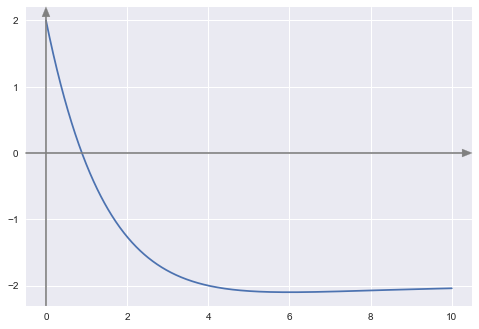

In [18]:
def f(x):
    return e**(-0.5*x) * (4 - x) -2
def df(x):
    return -0.5 * e**(-0.5*x) * (4 - x) - e**(-0.5*x)
graficar(f, 0, 10)

In [19]:
tabla , c_n = met_newton_rapshon(f, df, 2, 1e-10)
print(c_n)
tabla

0.885708802004777


a_n-1           a_n            f(a_n)         error_abs
n                                                                
1  2.0000000000  0.2817181715  1.2297431106e+00  1.7182818285e+00
2  0.2817181715  0.7768868450  1.8563037542e-01  4.9516867350e-01
3  0.7768868450  0.8817078789  6.5794683306e-03  1.0482103388e-01
4  0.8817078789  0.8857032412  9.1320299567e-06  3.9953622381e-03
5  0.8857032412  0.8857088020  1.7659651519e-11  5.5608273787e-06
6  0.8857088020  0.8857088020  4.4408920985e-16  1.0753620217e-11

In [20]:
tabla , c_n = met_newton_rapshon(f, df, 6, 1e-10)
print(c_n)
tabla

El metodo de falló, df(a) = 0
None


In [21]:
df(6)

0.0

El método falla porque x = 6 es un mínimo y la recta tangente tiene pendiente horizontal.

In [24]:
tabla , c_n = met_newton_rapshon(f, df, 8, 1e-10)
print(c_n)
tabla

El metodo de falló, se realizaron 2 iteraciones.
None


In [25]:
df(8)
8 - (f(8))/(df(8))
121.19630006628846 - (f(121.19630006628846))/(df(121.19630006628846))
df(7.212131452880089e+24)

0.0

#### Ejercicios de la cartilla
2. (a) Use el método de Newton para obtener una aproximación de las soluciones del siguente problema, con una precisión de $10^{-7}$.

$$4x^2 - 4 x e^{-2x} + e^{-4x}, \ \ \ \ \mbox{en}\ [0,1]$$

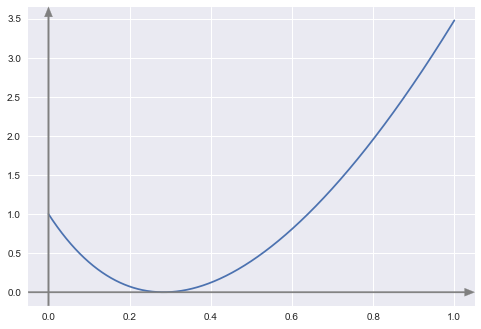

In [28]:
def f(x):
    return 4*x**2-4*x*e**(-2*x)+e**(-4*x)
def df(x):
    return 8*x-4*(e**(-2*x)-2*e**(-2*x)*x)-4*e**(-4*x)
graficar(f,0,1)

In [30]:
tabla , c_n = met_newton_rapshon(f, df, 0, 1e-7)
print(c_n)
tabla

0.28357155953963165


a_n-1           a_n            f(a_n)     error_abs
n                                                             
1   0.0000000000  0.1250000000  2.7963026818e-01  0.1250000000
2   0.1250000000  0.1993198435  7.4306848065e-02  0.0743198435
3   0.1993198435  0.2400970577  1.9173711771e-02  0.0407772142
4   0.2400970577  0.2614834037  4.8709967423e-03  0.0213863460
5   0.2614834037  0.2724380604  1.2276262277e-03  0.0109546566
6   0.2724380604  0.2779822713  3.0815233932e-04  0.0055442109
7   0.2779822713  0.2807712860  7.7194498662e-05  0.0027890147
8   0.2807712860  0.2821700442  1.9318219379e-05  0.0013987582
9   0.2821700442  0.2828704889  4.8320068639e-06  0.0007004447
10  0.2828704889  0.2832209781  1.2083083856e-06  0.0003504891
11  0.2832209781  0.2833962894  3.0211544055e-07  0.0001753113
12  0.2833962894  0.2834839617  7.5533653887e-08  0.0000876723
13  0.2834839617  0.2835278021  1.8884012687e-08  0.0000438403
14  0.2835278021  0.2835497233  4.7210781395e-09  0.0000219212
15  0.2835497233  0.2835606842  1.1802788746e-09  0.0000109609
16  0.2835606842  0.2835661647  2.9507080113e-10  0.0000054805
17  0.2835661647  0.2835689049  7.3767936204e-11  0.0000027403
18  0.2835689049  0.2835702751  1.8441914662e-11  0.0000013701
19  0.2835702751  0.2835709601  4.6104786655e-12  0.0000006851
20  0.2835709601  0.2835713027  1.1527445665e-12  0.0000003425
21  0.2835713027  0.2835714739  2.8799185259e-13  0.0000001713
22  0.2835714739  0.2835715595  7.2108985449e-14  0.0000000856

#### Ejercicios de la cartilla
2. (c) Use el método de Newton para obtener una aproximación de las soluciones del siguente problema, con una precisión de $10^{-7}$.

$$e^{-2} x^2 + 2 e^{-1} x = 1, \ \ \ \ \mbox{en}\ [-4,2]$$

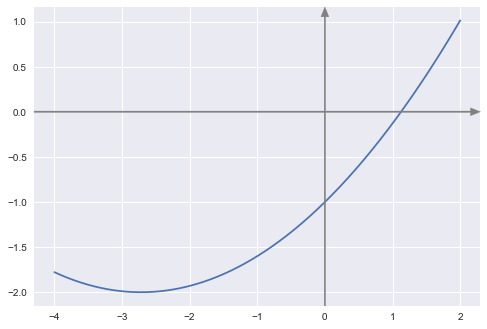

In [31]:
def f(x):
     return (((e**-2)*x**2)+(2*e**-1)*x)-1
def df(x):
     return ((2*x)/(e**2)+(2/e))
graficar(f,-4,2)

In [34]:
tabla , c_n = met_newton_rapshon(f, df, 0, 1e-7)
print(c_n)
tabla

1.1259491997000715


a_n-1           a_n            f(a_n)         error_abs
n                                                                
1  0.0000000000  1.3591409142  2.5000000000e-01  1.3591409142e+00
2  1.3591409142  1.1326174285  6.9444444444e-03  2.2652348570e-01
3  1.1326174285  1.1259549731  6.0073048829e-06  6.6624554619e-03
4  1.1259549731  1.1259491997  4.5108361491e-12  5.7733582861e-06
5  1.1259491997  1.1259491997  0.0000000000e+00  4.3351988666e-12

#### Ejercicios de la cartilla
2. (d) Use el método de Newton para obtener una aproximación de las soluciones del siguente problema, con una precisión de $10^{-7}$.
$$x^2 \cos^2(x) + \cos^2(x)-2x^3 \cos(x) -2x \cos(x) + x^4 +x^2, \ \ \ \ \mbox{en}\ [-1,1]$$

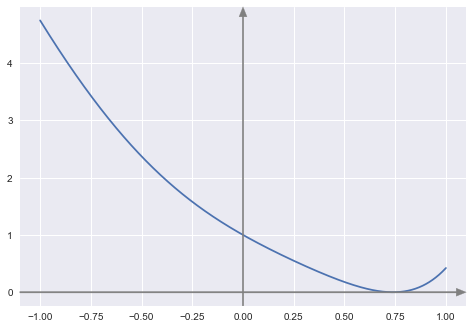

In [35]:
def f(x):
    return (x**2)*np.cos(x)**2+np.cos(x)**2-2*x**3*np.cos(x)-2*x*np.cos(x)+x**4+x**2
def df(x):
    return 2*(x-np.cos(x))*(2*x**2+(x**2+1)*np.sin(x)-x*np.cos(x)+1)
graficar (f,-1,1)

In [40]:
tabla , c_n = met_newton_rapshon(f, df, -1, 1e-7)
print(c_n)
tabla

0.0


a_n-1           a_n        f(a_n)     error_abs
n                                                        
1 -1.0000000000  0.5707963268  0.5186693693  1.5707963268
2  0.5707963268 -0.1168599040 -0.1163322651  0.6876562308
3 -0.1168599040  0.0010610221  0.0010610217  0.1179209261
4  0.0010610221 -0.0000000008 -0.0000000008  0.0010610229
5 -0.0000000008  0.0000000000  0.0000000000  0.0000000008

#### Ejercicios de la cartilla
3. (a) Utilice el método de Newton para aproximar la solución de cada ecuación desde el punto $p_0$, determine que sucede y justifique.
$$\tan^{-1}(x) = 0, \ \ \ p_0 = 1.39174520027073$$

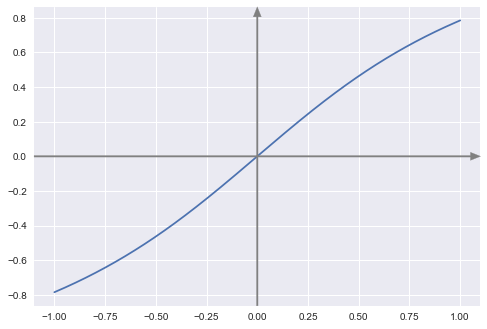

6.617444900424222e-24


a_n-1               a_n            f(a_n)     error_abs
n                                                                 
1   1.3917452003 -1.3917452003e+00 -9.4774713352e-01  2.7834904005
2  -1.3917452003  1.3917452003e+00  9.4774713352e-01  2.7834904005
3   1.3917452003 -1.3917452003e+00 -9.4774713352e-01  2.7834904005
4  -1.3917452003  1.3917452003e+00  9.4774713352e-01  2.7834904005
5   1.3917452003 -1.3917452003e+00 -9.4774713352e-01  2.7834904005
6  -1.3917452003  1.3917452003e+00  9.4774713352e-01  2.7834904005
7   1.3917452003 -1.3917452003e+00 -9.4774713352e-01  2.7834904005
8  -1.3917452003  1.3917452003e+00  9.4774713351e-01  2.7834904005
9   1.3917452003 -1.3917452002e+00 -9.4774713351e-01  2.7834904005
10 -1.3917452002  1.3917452002e+00  9.4774713349e-01  2.7834904004
11  1.3917452002 -1.3917452001e+00 -9.4774713345e-01  2.7834904003
12 -1.3917452001  1.3917451997e+00  9.4774713333e-01  2.7834903998
13  1.3917451997 -1.3917451988e+00 -9.4774713302e-01  2.7834903985
14 -1.3917451988  1.3917451964e+00  9.4774713220e-01  2.7834903952
15  1.3917451964 -1.3917451900e+00 -9.4774713003e-01  2.7834903864
16 -1.3917451900  1.3917451733e+00  9.4774712433e-01  2.7834903633
17  1.3917451733 -1.3917451291e+00 -9.4774710927e-01  2.7834903023
18 -1.3917451291  1.3917450124e+00  9.4774706955e-01  2.7834901415
19  1.3917450124 -1.3917447047e+00 -9.4774696476e-01  2.7834897171
20 -1.3917447047  1.3917438928e+00  9.4774668834e-01  2.7834885975
21  1.3917438928 -1.3917417511e+00 -9.4774595912e-01  2.7834856439
22 -1.3917417511  1.3917361013e+00  9.4774403541e-01  2.7834778524
23  1.3917361013 -1.3917211969e+00 -9.4773896055e-01  2.7834572982
24 -1.3917211969  1.3916818792e+00  9.4772557274e-01  2.7834030761
25  1.3916818792 -1.3915781620e+00 -9.4769025437e-01  2.7832600412
26 -1.3915781620  1.3913045855e+00  9.4759707782e-01  2.7828827475
27  1.3913045855 -1.3905831147e+00 -9.4735123846e-01  2.7818877002
28 -1.3905831147  1.3886814858e+00  9.4670245694e-01  2.7792646005
29  1.3886814858 -1.3836763250e+00 -9.4498923416e-01  2.7723578108
30 -1.3836763250  1.3705516603e+00  9.4045789338e-01  2.7542279853
31  1.3705516603 -1.3364734878e+00 -9.2842397177e-01  2.7070251480
32 -1.3364734878  1.2502655299e+00  8.9615899257e-01  2.5867390176
33  1.2502655299 -1.0467368442e+00 -8.0822900440e-01  2.2970023741
34 -1.0467368442  6.4703475170e-01  5.7428786228e-01  1.6937715959
35  0.6470347517 -1.6768100400e-01 -1.6613543759e-01  0.8147157557
36 -0.1676810040  3.1256502546e-03  3.1256400758e-03  0.1708066543
37  0.0031256503 -2.0357715233e-08 -2.0357715233e-08  0.0031256706
38 -0.0000000204  6.6174449004e-24  6.6174449004e-24  0.0000000204

In [45]:
def f(x):
    return np.arctan(x)
def df(x):
    return 1/(1+x**2)
graficar (f,-1,1)
tabla , c_n = met_newton_rapshon(f, df, 1.39174520027073, 1e-7)
print(c_n)
tabla

#### Ejercicios de la cartilla
3. (b) Utilice el método de Newton para aproximar la solución de cada ecuación desde el punto $p_0$, determine que sucede y justifique.
$$-x^4+6x^2+11, \ \ \ p_0 = 1$$

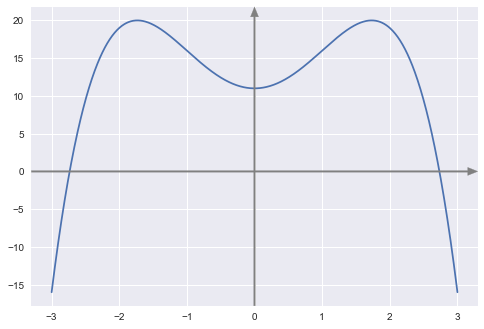

1.0


a_n-1  a_n  f(a_n)  error_abs
n                                 
1      1.0 -1.0    16.0        2.0
2     -1.0  1.0    16.0        2.0
3      1.0 -1.0    16.0        2.0
4     -1.0  1.0    16.0        2.0
5      1.0 -1.0    16.0        2.0
..     ...  ...     ...        ...
96    -1.0  1.0    16.0        2.0
97     1.0 -1.0    16.0        2.0
98    -1.0  1.0    16.0        2.0
99     1.0 -1.0    16.0        2.0
100   -1.0  1.0    16.0        2.0

[100 rows x 4 columns]

In [58]:
def f(x):
    return -x**4 + 6*x**2+11
def df(x):
    return -4*x**3 + 12*x
graficar (f,-3,3)
tabla , c_n = met_newton_rapshon(f, df, 1, 1e-7)
print(c_n)
tabla

#### Ejercicios de la cartilla
3. (x) Utilice el método de Newton para aproximar la solución de cada ecuación desde el punto $p_0$, determine que sucede y justifique.
$$1 - 2e^{-x^2}, \ \ \ p_0 = 0.83255461$$

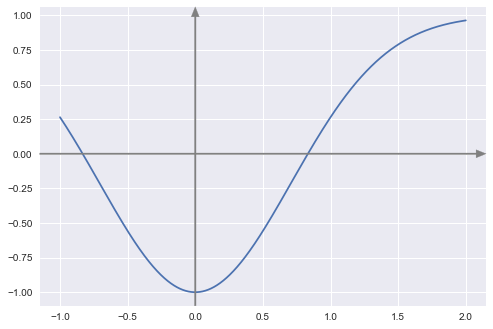

0.8325546111576978


a_n-1           a_n  f(a_n)     error_abs
n                                                
1  0.83255461  0.8325546112     0.0  0.0000000012

In [62]:
def f(x):
    return 1-2*e**(-x**2)
def df(x):
    return 4*e**(-x**2)*x
graficar(f, -1,2)
tabla , c_n = met_newton_rapshon(f, df, 0.83255461, 1e-7)
print(c_n)
tabla

#### Ejercicios de la cartilla
6. Sea $f(x) = \ln(x)$, $p_0 = 2.8$ y $p_1 = 2.64$; utilice el método de la secante para aproximar un cero de la función con una precisión $10^{-4}$ y compare con el resultado de aplicar el método de Newton, con punto inicial $p_0 = 2.8$.

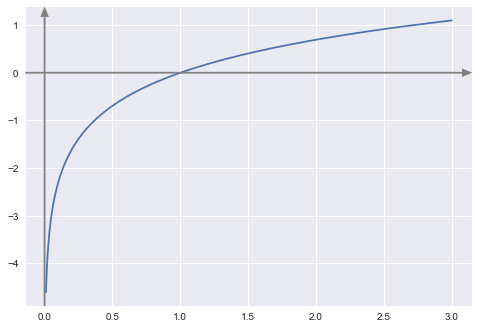

1.0000000000000093


x_n            f(x_n)         error
n                                               
0   2.8000000000  1.0296194172e+00           NaN
1   2.6400000000  9.7077891716e-01           NaN
2   0.0002429163 -8.3227937113e+00  2.6397570837
3   2.3642588372  8.6046458474e-01  2.3640159209
4   2.1427522747  7.6209111237e-01  0.2215065625
5   0.4267593496 -8.5153500868e-01  1.7159929251
6   1.3323148753  2.8691793706e-01  0.9055555257
7   1.1040927742  9.9023978901e-02  0.2282221011
8   0.9838150348 -1.6317372358e-02  0.1202777394
9   1.0008307593  8.3041444298e-04  0.0170157245
10  1.0000067403  6.7402355405e-06  0.0008240191
11  0.9999999972 -2.7993756241e-09  0.0000067431
12  1.0000000000  9.3258734069e-15  0.0000000028

In [69]:
def f(x):
    return np.log(x)
def df(x):
    return 1/x
graficar(f, 0.01,3)
tabla , c_n = met_secante(f, 2.8, 2.64, 1e-7)
print(c_n)
tabla

In [73]:
tabla , c_n = met_newton_rapshon(f, df, 2.8, 1e-7)
print(c_n)
tabla

nan


<ipython-input-69-5747f8cbe281>:2: RuntimeWarning: invalid value encountered in log
  return np.log(x)


a_n-1           a_n  f(a_n)     error_abs
n                                                  
1  2.8000000000 -0.0829343681     NaN  2.8829343681
2 -0.0829343681           NaN     NaN           NaN